In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import caffe

%matplotlib inline

In [2]:
def detect_faces(image):
    height, width, depth = image.shape
    DOWNSCALE = 4

    classifier = cv2.CascadeClassifier('Detector_XML/haarcascade_frontalface_alt.xml')
    mini_size = (int(width/DOWNSCALE), int(height/DOWNSCALE))

    small_img = cv2.resize(image, mini_size)
    faces = classifier.detectMultiScale(small_img)
    
    if(len(faces) > 0):
        for face in faces:
            x, y, w, h = [ coordinate*DOWNSCALE for coordinate in face ]
            color = (0, 0, 255)
            point1 = (x, y)
            point2 = (x + w, y + h)
            cv2.rectangle(image, point1, point2, color)
    return image

In [6]:
def show_image(img, title):
    plt.imshow(img[:,:,::-1])
    plt.title(title)
    plt.axis('off')

In [7]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    img = frame.copy()
    frame = detect_faces(frame)
    cv2.imshow('frame', frame)
    if((cv2.waitKey(1) & 0xFF) == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()

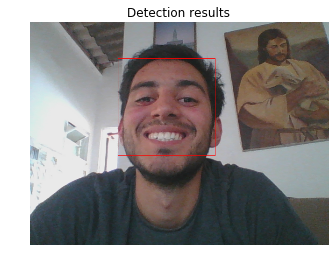

In [9]:
show_image(frame, 'Detection results')

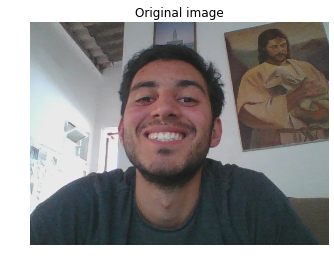

In [10]:
show_image(img, 'Original image')